In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
#plt.rcParams['figure.figsize'] = (30, 20)
%matplotlib inline

toBike = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q4.xlsx')
toBike.trip_start_time = pd.to_datetime(toBike.trip_start_time)
toBike.trip_stop_time = pd.to_datetime(toBike.trip_stop_time)

toBike.head(10)

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,462305,2016-01-10 00:00:00,2016-01-10 00:07:00,394,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual
1,462306,2016-01-10 00:00:00,2016-01-10 00:09:00,533,Sherbourne St / Wellesley St,Edward St / Yonge St,Member
2,462307,2016-01-10 00:00:00,2016-01-10 00:07:00,383,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual
3,462308,2016-01-10 00:01:00,2016-01-10 00:27:00,1557,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual
4,462309,2016-01-10 00:01:00,2016-01-10 00:27:00,1547,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual
5,462310,2016-01-10 00:01:00,2016-01-10 00:04:00,173,College Park South,Dundas St / Yonge St,Member
6,462311,2016-01-10 00:02:00,2016-01-10 00:28:00,1562,Queen St W / York St (City Hall),Dundas St W / Crawford St,Casual
7,462312,2016-01-10 00:02:00,2016-01-10 00:09:00,440,Church St / Bloor St E,College Park South,Member
8,462313,2016-01-10 00:03:00,2016-01-10 00:07:00,246,Navy Wharf Ct. / Bremner Blvd.,Widmer St / Adelaide St,Member
9,462314,2016-01-10 00:03:00,2016-01-10 00:28:00,1506,Queen St W / York St (City Hall),Dundas St W / Crawford St,Casual


In [2]:
toBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217569 entries, 0 to 217568
Data columns (total 7 columns):
trip_id                  217569 non-null int64
trip_start_time          217569 non-null datetime64[ns]
trip_stop_time           217569 non-null datetime64[ns]
trip_duration_seconds    217569 non-null int64
from_station_name        217567 non-null object
to_station_name          217567 non-null object
user_type                217569 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 11.6+ MB


In [3]:
toBike["trip_dayofweek"] = toBike.trip_start_time.dt.dayofweek

age_analysis = toBike.groupby('trip_dayofweek')['trip_duration_seconds'].agg(['sum', 'mean']).reset_index()
#age_analysis
type_day = pd.crosstab(toBike.trip_dayofweek, toBike.user_type, values=toBike.trip_duration_seconds, aggfunc="mean")

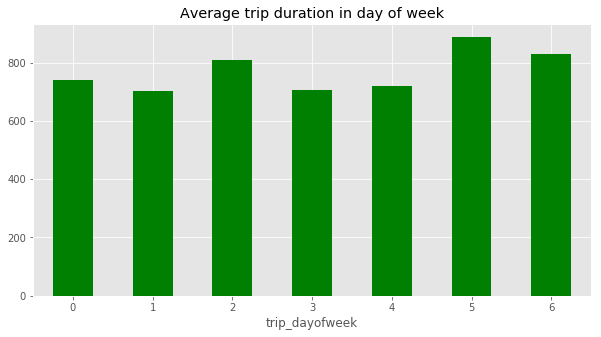

In [4]:
age_analysis.plot(x='trip_dayofweek', y='mean', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Average trip duration in day of week');

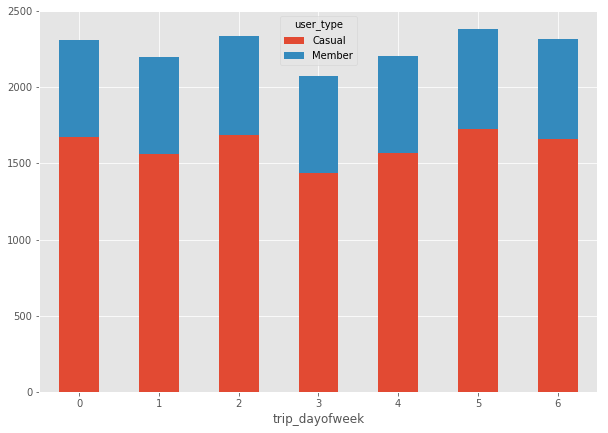

In [5]:
type_day.plot(kind='bar', stacked=True, rot = 0, figsize=(10, 7));

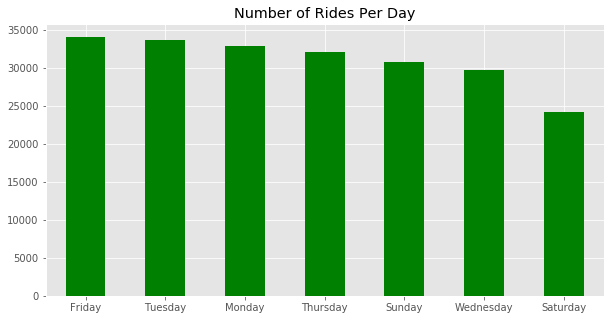

In [6]:
import datetime
from dateutil.parser import parse

dates = toBike['trip_start_time'].tolist()

days = []

for i in range(len(dates)):
    if type(dates[i]) == str:
        dates[i] = parse(dates[i])
    day = dates[i].strftime("%A")
    days.append(day)

days_df = pd.Series(days)
day_count = days_df.value_counts()
day_count.plot(x='Day', y='Rides', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Number of Rides Per Day')

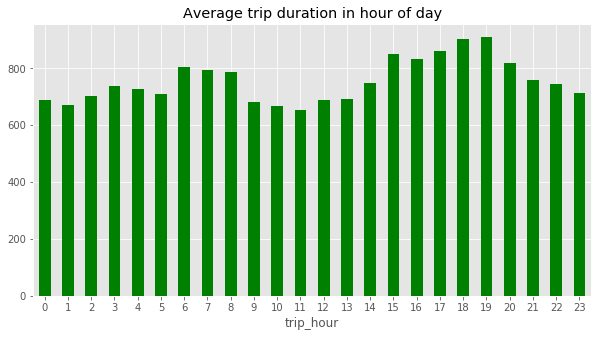

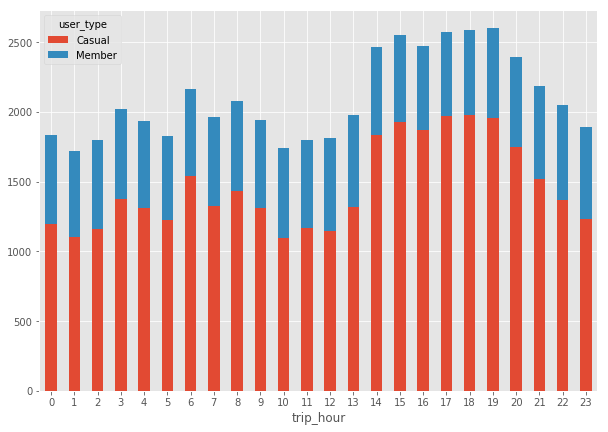

In [7]:
#Question 3:
toBike["trip_hour"] = toBike.trip_start_time.dt.hour

hour_analysis = toBike.groupby('trip_hour')['trip_duration_seconds'].agg(['sum', 'mean']).reset_index()
#age_analysis
type_hour = pd.crosstab(toBike.trip_hour, toBike.user_type, values=toBike.trip_duration_seconds, aggfunc="mean")

hour_analysis.plot(x='trip_hour', y='mean', kind='bar', legend=False, color = 'g', 
                  rot=0, figsize=(10, 5), title = 'Average trip duration in hour of day');

type_hour.plot(kind='bar', stacked=True, rot = 0, figsize=(10, 7));

# Q1: Distribution by Month for 2016 Q3 & Q4 (Raghav)

## Data Cleaning of 2016 Q3/Q4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Our temporal data types
from datetime import datetime
from datetime import timedelta

t2016Q4 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q4.xlsx',\
                    names=['trip_id','start','end','duration','from','to','user_type'])

t2016Q3 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q3.xlsx',
                       names=['trip_id','start','end','duration','from','to','user_type'])

#t1415 = pd.read_excel('2014Q4_to_2015Q3_Bike_Share_Toronto_Ridership.xlsx')

In [3]:
#Convert the start datetime into datetime objects
t2016Q4['start'] = pd.to_datetime(t2016Q4['start'])
t2016Q3['start'] = pd.to_datetime(t2016Q3['start'])

In [5]:
#Convert the end datetime into datetime objects
t2016Q4['end'] = pd.to_datetime(t2016Q4['end'])
t2016Q3['end'] = pd.to_datetime(t2016Q3['end'])

In [6]:
#For start times of Q4 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q4['start'],freq='Q') != '2016Q4') #get all values that are not within the 
                                                                #2016 Q4 range
s = pd.DatetimeIndex(t2016Q4.loc[mask,'start'].dt.strftime('%Y-%d-%m %H:%M:%S')) #For all those start datetime
                                                                            #entries that don't fall into Q4,
                                                                            #swap the day and the month values
t2016Q4.loc[mask,'start'] = pd.to_datetime(s) #Finally,convert above string to datetime again

In [7]:
#For end times of Q4 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q4['end'],freq='Q') != '2016Q4')
s = pd.DatetimeIndex(t2016Q4.loc[mask,'end'].dt.strftime('%Y-%d-%m %H:%M:%S'))
t2016Q4.loc[mask,'end'] = pd.to_datetime(s)

In [10]:
#For start times of Q3 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q3['start'],freq='Q') != '2016Q3')
s = pd.DatetimeIndex(t2016Q3.loc[mask,'start'].dt.strftime('%Y-%d-%m %H:%M:%S'))
t2016Q3.loc[mask,'start'] = pd.to_datetime(s)

In [11]:
#For end times of Q3 - Clean the datetime values
mask = (pd.PeriodIndex(t2016Q3['end'],freq='Q') != '2016Q3')
s = pd.DatetimeIndex(t2016Q3.loc[mask,'end'].dt.strftime('%Y-%d-%m %H:%M:%S'))
t2016Q3.loc[mask,'end'] = pd.to_datetime(s)

In [13]:
#In Q3 data, one datetime entry was found to be 2000-01-01 which needs to be removed
anomaly = t2016Q3[t2016Q3.start.dt.year == 2000] #Check for start datetime whose year is 2000
t2016Q3.drop(anomaly.index, axis='rows',inplace=True) #Drop the anomaly value from Q3 dataset
t2016Q3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367961 entries, 0 to 367961
Data columns (total 7 columns):
trip_id      367961 non-null int64
start        367961 non-null datetime64[ns]
end          367961 non-null datetime64[ns]
duration     367961 non-null int64
from         367958 non-null object
to           367959 non-null object
user_type    367961 non-null object
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 22.5+ MB


In [14]:
#Check if the anomaly 2000-01-01 still exists in Q3 dataset
(t2016Q3[t2016Q3.start.dt.year == 2000])

,trip_id,start,end,duration,from,to,user_type


## Distribution of Rides by Month in 2016 Q3/Q4

### 2016 Q4

In [18]:
#Cleaned Q4 dataset
t2016Q4['start_month'] = t2016Q4.start.dt.month_name()
t2016Q4.head()

,trip_id,start,end,duration,from,to,user_type,start_month
0,462305,2016-10-01 00:00:00,2016-10-01 00:07:00,394,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual,October
1,462306,2016-10-01 00:00:00,2016-10-01 00:09:00,533,Sherbourne St / Wellesley St,Edward St / Yonge St,Member,October
2,462307,2016-10-01 00:00:00,2016-10-01 00:07:00,383,Queens Quay W / Dan Leckie Way,Fort York Blvd / Garrison Rd,Casual,October
3,462308,2016-10-01 00:01:00,2016-10-01 00:27:00,1557,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual,October
4,462309,2016-10-01 00:01:00,2016-10-01 00:27:00,1547,Cherry St / Distillery Ln,Fort York Blvd / Capreol Crt,Casual,October


In [19]:
#Group the Q4 dataframe by the start month name
t2016Q4_grp = t2016Q4.groupby(['start_month']).count()
t2016Q4_grp

,trip_id,start,end,duration,from,to,user_type
start_month,,,,,,,
December,41605,41605,41605,41605,41605,41605,41605
November,78666,78666,78666,78666,78666,78666,78666
October,97298,97298,97298,97298,97296,97296,97298


### 2016 Q3 

In [20]:
#Cleaned Q3 dataset
t2016Q3['start_month'] = t2016Q3.start.dt.month_name()
t2016Q3.head()

,trip_id,start,end,duration,from,to,user_type,start_month
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member,July
1,53394,2016-07-09 02:15:00,2016-07-09 02:22:00,417,Riverdale Park North (Broadview Ave),Dundas St E / Regent Park Blvd,Member,July
2,58314,2016-07-10 17:04:00,2016-07-10 17:36:00,1904,Dundas St E / Regent Park Blvd,Queen St W / Close Ave,Member,July
3,60784,2016-07-11 01:45:00,2016-07-11 01:58:00,784,Union Station,Dundas St E / Regent Park Blvd,Member,July
4,93164,2016-07-18 13:35:00,2016-07-18 13:42:00,443,Front St W / Blue Jays Way,Front St / Yonge St (Hockey Hall of Fame),Member,July


In [21]:
#Group the Q3 dataframe by the start month name
t2016Q3_grp = t2016Q3.groupby(['start_month']).count()
t2016Q3_grp

,trip_id,start,end,duration,from,to,user_type
start_month,,,,,,,
August,130437,130437,130437,130437,130437,130437,130437
July,107384,107384,107384,107384,107384,107384,107384
September,130140,130140,130140,130140,130137,130138,130140


### Combining Q3/Q4 Together

In [22]:
#Combine both Q3 and Q4 by row - from July to Dec 2016
t2016Q3Q4 = pd.concat([t2016Q3_grp,t2016Q4_grp])
lst2016 = list(t2016Q3Q4.index)

In [23]:
#We want to organize our final dataset by month
months = ['January','February','March','April','May','June',\
         'July','August','September','October','November','December']
t2016Q3Q4.index = pd.Categorical(t2016Q3Q4.index,categories=months,ordered=True)

In [24]:
#Finally, sort by the index which is the start month name
#and save these changes to the original dataframe
t2016Q3Q4.sort_index(inplace=True)
t2016Q3Q4

,trip_id,start,end,duration,from,to,user_type
July,107384,107384,107384,107384,107384,107384,107384
August,130437,130437,130437,130437,130437,130437,130437
September,130140,130140,130140,130140,130137,130138,130140
October,97298,97298,97298,97298,97296,97296,97298
November,78666,78666,78666,78666,78666,78666,78666
December,41605,41605,41605,41605,41605,41605,41605


### Plotting of Monthly Ridership in 2016 Q3/Q4 

n_grp = 6
x_pos = [0 1 2 3 4 5]


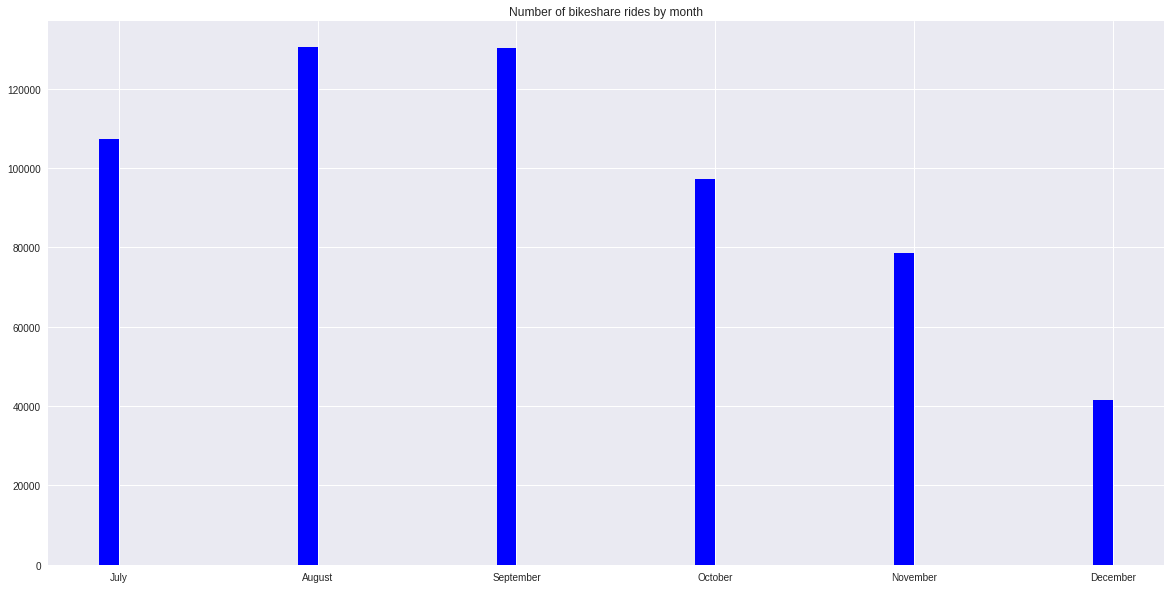

In [26]:
#Using Matplotlib, let's plot the total rides by month from July to December 2016

plt.style.use(style='seaborn')
fig, ax = plt.subplots(figsize=(20,10))

n_grp = t2016Q3Q4.index.size
print("n_grp =", n_grp)
x_pos = np.arange(n_grp)
print("x_pos =", x_pos)
width = 0.1

ax.set(title='Number of bikeshare rides by month',\
      xticks=x_pos+width/2,\
      xticklabels=t2016Q3Q4.index)

ax.bar(x_pos, t2016Q3Q4['start'], width, color='blue',align='center',label='months')
plt.show()